# Evaluating language knowledge of ELL students from grades 8-12

## Import Libraries

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

## Loading The Dataset

*Using Pandas Library, we’ll load the CSV file. Named it with ellTrainData for the dataset.*

In [43]:
ellTrainData = pd.read_csv('input/train.csv')

In [44]:
ellTrainData.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


## Data Profiling & Cleaning

*Get the number of columns and rows*

In [45]:
ellTrainData.shape

(3911, 8)

In [46]:
ellTrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text_id      3911 non-null   object 
 1   full_text    3911 non-null   object 
 2   cohesion     3911 non-null   float64
 3   syntax       3911 non-null   float64
 4   vocabulary   3911 non-null   float64
 5   phraseology  3911 non-null   float64
 6   grammar      3911 non-null   float64
 7   conventions  3911 non-null   float64
dtypes: float64(6), object(2)
memory usage: 244.6+ KB


*From the info, we know that there are 3911 entries and 8 columns.*

In [47]:
ellTrainData.isnull().sum()

text_id        0
full_text      0
cohesion       0
syntax         0
vocabulary     0
phraseology    0
grammar        0
conventions    0
dtype: int64

*There are no null entries.*

In [48]:
ellTrainData.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [49]:
ellTrainData['full_text'] = ellTrainData['full_text'].replace(r'[^A-Za-z0-9.,!?\'\"]+', ' ', regex=True)

In [56]:
num = 0
for i in range(3911):
    num += ellTrainData['full_text'][i].count('\"')
num

3005

## Exploratory Analysis and Visualization

In [50]:
ellTrainData['text_len'] = ellTrainData['full_text'].apply(lambda x: len(x))
ellTrainData['words_num'] = ellTrainData['full_text'].apply(lambda x: len(x.split()))

In [51]:
ellTrainData

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,text_len,words_num
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,1371,261
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,2630,533
2,00299B378633,"Dear, Principal If u change the school policy ...",3.0,3.5,3.0,3.0,3.0,2.5,1662,320
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,3966,728
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,1191,234
...,...,...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5,973,180
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0,2593,465
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0,1296,258
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5,2827,510


<AxesSubplot:xlabel='words_num', ylabel='Density'>

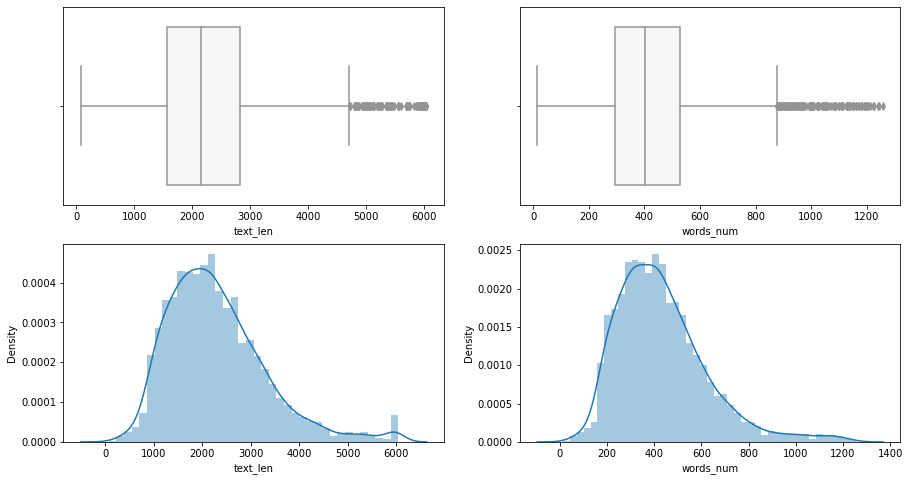

In [52]:
# Length of full_text and words num
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
sns.boxplot(ellTrainData['text_len'], palette='PRGn', ax = ax[0, 0])
sns.distplot(ellTrainData['text_len'], ax = ax[1, 0])
sns.boxplot(ellTrainData['words_num'], palette='PRGn', ax = ax[0, 1])
sns.distplot(ellTrainData['words_num'], ax = ax[1, 1])